<h1 align=center><font size = 5>Data Science amb Python</font></h1>



## Sprint 15 
#### S15 T01: Clasifica los diferentes vuelos

#### Cristiane de Souza da Silva

Juny 2021

### Descripción del conjunto de datos

#### Airline2008Nov Dataset Variable definition

 Name                |  Description      
---------------------|:-------------
1.Year               |  2008 
2.Month              |   11
3.DayofMonth         |   1-31
4.DayOfWeek          |  1 (Monday) - 7 (Sunday)
5.DepTime            |actual departure time (local, hhmm)
6.CRSDepTime         |scheduled departure time (local, hhmm)
7.ArrTime            |actual arrival time (local, hhmm)
8.CRSArrTime         |scheduled arrival time (local, hhmm)
9.UniqueCarrier      |unique carrier code
10.FlightNum         |flight number
11.TailNum           |plane tail number
12.ActualElapsedTime |in minutes
13.CRSElapsedTime    |CRS Elapsed Time of Flight (estimated elapse time), in minutes
14.AirTime           |Flight Time, in Minutes, in minutes
15.ArrDelay          |Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
16.DepDelay          |Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
17.Origin            |origin IATA airport code
18.Dest              |destination IATA airport code
19.Distance          |Distance between airports (miles)
20.TaxiIn            |Wheels down and arrival at the destination airport gate, in minutes           
21.TaxiOut           |The time elapsed between departure from the origin airport gate and wheels off, in minutes
22.Cancelled         |was the flight cancelled?
23.CancellationCode  |reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.Diverted          |1 = yes, 0 = no
25.CarrierDelay      |minutes. Carrier delay is within the control of the air carrier. Examples:: aircraft cleaning, aircraft damage, etc
26.WeatherDelay      |munutes. Weather delay is caused by extreme or hazardous weather conditions
27.NASDelay          |minutes. Delay that is within the control of the National Airspace System (NAS) Ex:airport operations,heavy traffic volume,etc
28.SecurityDelay     |minutes. caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach,etc  
29.LateAircraftDelay |minutes. Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport.           

More information about flights delay can be seen in [Federal Aviation Administration site](https://aspmhelp.faa.gov/index/Types_of_Delay.html).

### Ejercicio 1
**Clasifica los diferentes vuelos utilizando el algoritmo de K-means.**

Importaré el conjunto de datos limpiado y procesado del Sprint 12 anterior.

In [1]:
# import the needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Importar el dataset

df= pd.read_csv('flight_numeric.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend
0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,-14.0,8.0,135,284,810,0
1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,2.0,19.0,135,284,810,0
2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,14.0,8.0,140,48,515,0
3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,34.0,140,48,515,0
4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,11.0,25.0,140,149,688,0


Agreguemos una columna con números para identificar los vuelos. Estos serían los 'id' de ellos.

In [3]:
df['id_flights'] = np.arange(len(df))

first_column = df.pop('id_flights')
df.insert(0, 'id_flights', first_column)

df.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend
0,0,1,3,4,2003.0,2211.0,17,128.0,150.0,116.0,-14.0,8.0,135,284,810,0
1,1,1,3,4,754.0,1002.0,17,128.0,145.0,113.0,2.0,19.0,135,284,810,0
2,2,1,3,4,628.0,804.0,17,96.0,90.0,76.0,14.0,8.0,140,48,515,0
3,3,1,3,4,1829.0,1959.0,17,90.0,90.0,77.0,34.0,34.0,140,48,515,0
4,4,1,3,4,1940.0,2121.0,17,101.0,115.0,87.0,11.0,25.0,140,149,688,0


In [4]:
df.shape

(1928371, 16)

El dataset contiene 1.928.371 entradas y exige computacionalmente. Por lo tanto, trabajaremos con una amostra de 1% de los datos.

In [5]:
import random
random.seed(8)

k = 19284
df_sample = df.sample(k).reset_index(drop=True)
df_sample.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend
0,965981,6,8,7,1920.0,102.0,15,222.0,230.0,202.0,3.0,11.0,80,37,1754,1
1,572804,4,4,5,1653.0,1834.0,17,101.0,60.0,52.0,124.0,83.0,76,130,239,0
2,575159,4,6,7,2111.0,2344.0,17,273.0,275.0,260.0,149.0,151.0,35,157,1797,1
3,12129,1,13,7,1118.0,1216.0,17,58.0,60.0,45.0,11.0,13.0,264,47,296,1
4,477533,3,1,6,625.0,930.0,7,125.0,127.0,111.0,23.0,25.0,137,18,781,1


#### Principal Componet Analysis (PCA)

Las principales razones de  utilizar el PCA antes de la segmentación de datos es mejorar el rendimiento de nuestro algoritmo. Además de eso, al disminuir el número de funciones, también se reduce el ruido.

El *dataframe* df  contien 16 atributos y es imposible visualizarlos en dimensiones. 


Usaremos *StandardScaler()* para estandarizar nuestros datos, que actualmente se encuentran en el marco de datos de segmentación de df

In [6]:
from sklearn.preprocessing import StandardScaler
X = df_sample.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.02996731, -0.8757602 ,  1.50144023, ..., -1.3997627 ,
         1.68635219,  1.6540137 ],
       [-0.60756802, -1.33102802,  0.49848637, ..., -0.25261198,
        -0.91846016, -0.60458991],
       [-0.60756802, -1.10339411,  1.50144023, ...,  0.08043178,
         1.76028416,  1.6540137 ],
       ...,
       [ 1.41403449, -0.76194325,  1.50144023, ...,  0.08043178,
         1.6794748 ,  1.6540137 ],
       [-0.31876766,  0.94531107,  0.9999633 , ...,  1.0672281 ,
        -0.89095059,  1.6540137 ],
       [ 1.70283484,  0.14859239, -0.50446748, ...,  0.35180077,
        -0.65024186, -0.60458991]])

El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones.
Primeramente vamos tentar utilizar el PCA con dos componentes y despues verificar su variancia.

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

La variable **explicada_varianza_ratio_** indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo del eje de cada componente principal.

In [8]:
print(pca.explained_variance_ratio_)

[0.43726372 0.39284822]


Esto le indica que el 44.0% de la varianza del conjunto de datos se encuentra a lo largo del primer eje y el 38.9% a lo largo del segundo eje, sumando 82,9%.
Una regla general es preservar alrededor del 80% de la varianza. Entonces, en este caso, decidimos mantener 2 componentes.

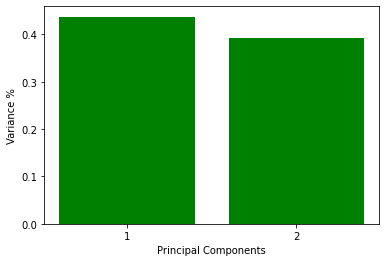

In [9]:
# Trazar las variaciones para cada PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='green')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC);



In [10]:
# Poner componentes en un dataframe para más tarde
PCA_components = pd.DataFrame(data= principalComponents, columns = ['principal component 1', 'principal component 2'])
PCA_components.head()

,principal component 1,principal component 2
0,1391.416782,325.634187
1,-488.392287,-349.184151
2,-302.103792,1370.772127
3,245.120891,-697.893845
4,933.015436,-506.704953


#### Aplicando Kmeans con los principals componentes de PCA

La PCA ayudó a reducir las dimenciones pero el grafico de arriba no apresenta de manera muy distinta los dos grupamientos. 

Para que los clústeres sean más evidentes, usemos el algoritmo de clústeres K-means para codificarlos por colores.

#### Clustering - Kmeans

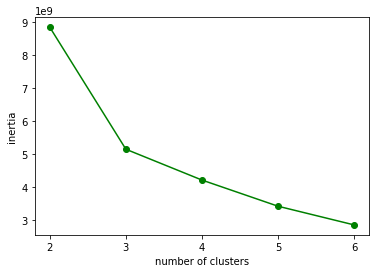

In [11]:
#Encontrando el numero optimo de agrupamientos ( clusters)

ks= range (2,7)
inertias= []

for k in ks:
    model= KMeans(n_clusters=k)
    model.fit(PCA_components)
    inertias.append(model.inertia_)
    
    
plt.plot(ks, inertias, '-o', color='green')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

El grafico de arriba muestra que la inercia cae rápidamente a medida que aumentamos k hasta 3, pero luego disminuye  más lentamente despues de este valor. Hay un "codo" en k = 3 y  cualquier valor más alto no proporcionaría una alteracion significativa en los valores de inercia.

Un enfoque más preciso es utilizar la puntuación de silueta, que es el coeficiente de silueta medio en todas las instancias.
Pero este enfoque también es más costoso desde el punto de vista computacional.

In [12]:
#Ejecutaremos el modelo Kmeans con 3 clusters y lo ajustaremos a los componentes del pca 

k_means_pca = KMeans(init = "k-means++", n_clusters = 3, n_init = 12, random_state=42).fit(PCA_components)


In [13]:
#Vamos verificar los labels de los clustering
labels_pca = k_means_pca.labels_
labels_pca
clusters_pca = pd.concat([PCA_components, pd.DataFrame({'pca_clusters':labels_pca})], axis=1)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


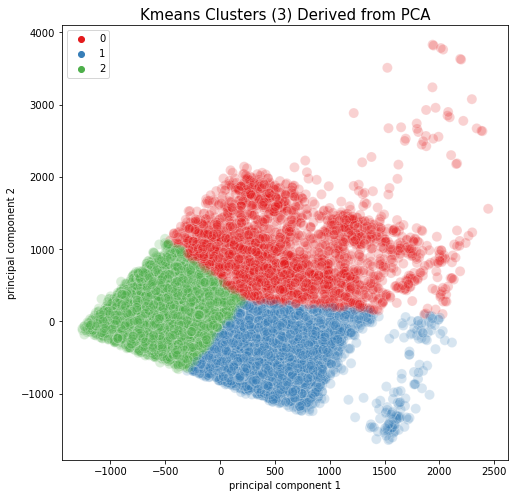

In [14]:
# Crearemos el grafico de los dos principales componentes.
plt.figure(figsize=(8,8))

sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title('Kmeans Clusters (3) Derived from PCA',
                                   fontsize=15)

plt.legend()
plt.show()

#### Analisis de los resultados de la agrupación en clústeres de PCA y K-Means

Crearemos un nuevo dataframe con los atributos originales, los componentes del PCA y los labels de los agrupamientos

In [15]:
# Primero concatenamos los atributos originales y los componente del PCA
df_pca_kmeans = pd.concat([df_sample.reset_index(drop=True), 
                          PCA_components], axis=1)

df_pca_kmeans.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2
0,965981,6,8,7,1920.0,102.0,15,222.0,230.0,202.0,3.0,11.0,80,37,1754,1,1391.416782,325.634187
1,572804,4,4,5,1653.0,1834.0,17,101.0,60.0,52.0,124.0,83.0,76,130,239,0,-488.392287,-349.184151
2,575159,4,6,7,2111.0,2344.0,17,273.0,275.0,260.0,149.0,151.0,35,157,1797,1,-302.103792,1370.772127
3,12129,1,13,7,1118.0,1216.0,17,58.0,60.0,45.0,11.0,13.0,264,47,296,1,245.120891,-697.893845
4,477533,3,1,6,625.0,930.0,7,125.0,127.0,111.0,23.0,25.0,137,18,781,1,933.015436,-506.704953


In [16]:
# Ahora adicionamos los labels de los clustering.
df_pca_kmeans['Kmeans PCA'] = labels_pca
df_pca_kmeans.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
0,965981,6,8,7,1920.0,102.0,15,222.0,230.0,202.0,3.0,11.0,80,37,1754,1,1391.416782,325.634187,0
1,572804,4,4,5,1653.0,1834.0,17,101.0,60.0,52.0,124.0,83.0,76,130,239,0,-488.392287,-349.184151,2
2,575159,4,6,7,2111.0,2344.0,17,273.0,275.0,260.0,149.0,151.0,35,157,1797,1,-302.103792,1370.772127,0
3,12129,1,13,7,1118.0,1216.0,17,58.0,60.0,45.0,11.0,13.0,264,47,296,1,245.120891,-697.893845,1
4,477533,3,1,6,625.0,930.0,7,125.0,127.0,111.0,23.0,25.0,137,18,781,1,933.015436,-506.704953,1


#### Examinando los Clusters - Kmeans

Hay 3 clusters para clasificar los diferentes vuelos del dataset.

Primeramente vamos separar los clusters en diferentes dataframes y verificar sus estatisticas para compreender lo que fue separado en grupos.

#### Cluster 0

In [17]:
df_cluster_0 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 0]
df_cluster_0.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
0,965981,6,8,7,1920.0,102.0,15,222.0,230.0,202.0,3.0,11.0,80,37,1754,1,1391.416782,325.634187,0
2,575159,4,6,7,2111.0,2344.0,17,273.0,275.0,260.0,149.0,151.0,35,157,1797,1,-302.103792,1370.772127,0
15,355656,2,13,3,1830.0,2154.0,4,384.0,380.0,354.0,114.0,110.0,150,47,2465,0,309.044682,1823.347350,0
26,266028,2,15,5,1625.0,1957.0,15,332.0,341.0,309.0,42.0,51.0,266,210,2072,0,357.765071,1342.211146,0
27,1119385,7,8,2,1354.0,1606.0,19,192.0,199.0,179.0,63.0,70.0,135,20,1297,0,347.810877,420.483338,0


In [18]:
df_cluster_0.describe()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
count,2.859000e+03,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.000000,2859.0
mean,9.996636e+05,6.208115,15.711088,4.057013,1444.398741,1609.101784,9.320042,266.633788,269.727527,239.089542,37.090941,40.184680,159.523610,166.835257,1886.645680,0.283316,596.631657,970.356111,0.0
std,5.552322e+05,3.476059,8.702721,1.980460,449.165006,588.036429,6.148050,64.680281,61.202045,60.209830,55.586001,50.395082,74.689502,74.420334,492.858149,0.450687,573.289212,493.107721,0.0
min,9.500000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,160.000000,129.000000,-46.000000,6.000000,2.000000,2.000000,1142.000000,0.000000,-457.128891,102.269412,0.0
25%,5.318185e+05,3.000000,8.000000,2.000000,1128.500000,1337.000000,4.000000,220.000000,225.000000,195.000000,5.000000,11.000000,96.000000,129.000000,1522.000000,0.000000,180.038950,594.887892,0.0
50%,1.033713e+06,6.000000,16.000000,4.000000,1435.000000,1741.000000,8.000000,255.000000,258.000000,228.000000,20.000000,22.000000,157.000000,157.000000,1750.000000,0.000000,484.896579,920.004692,0.0
75%,1.468152e+06,9.000000,23.000000,6.000000,1759.000000,2041.500000,15.000000,303.000000,305.000000,276.000000,49.000000,48.000000,219.000000,220.000000,2237.000000,1.000000,992.700520,1250.969169,0.0
max,1.928222e+06,12.000000,31.000000,7.000000,2400.000000,2400.000000,19.000000,727.000000,660.000000,623.000000,575.000000,555.000000,299.000000,298.000000,4962.000000,1.000000,2444.045432,3830.916648,0.0


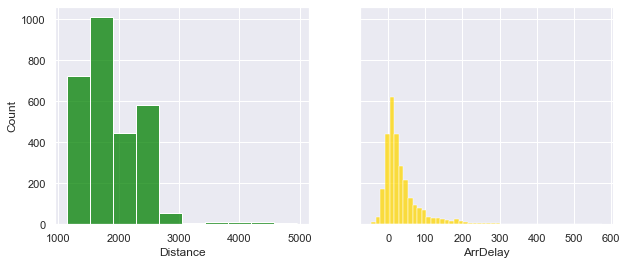

In [19]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_0, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_0, x="ArrDelay",color="gold", ax=ax2, bins=50);


#### Cluster 1

In [20]:
df_cluster_1 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 1]
df_cluster_1.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
3,12129,1,13,7,1118.0,1216.0,17,58.0,60.0,45.0,11.0,13.0,264,47,296,1,245.120891,-697.893845,1
4,477533,3,1,6,625.0,930.0,7,125.0,127.0,111.0,23.0,25.0,137,18,781,1,933.015436,-506.704953,1
7,1581954,10,10,5,1345.0,1443.0,9,118.0,113.0,97.0,21.0,16.0,104,116,620,0,133.805408,-252.760863,1
10,1910072,12,20,6,1104.0,1411.0,4,187.0,97.0,79.0,174.0,84.0,37,46,396,1,166.780237,-514.804220,1
13,310021,2,15,5,854.0,939.0,11,45.0,45.0,31.0,14.0,14.0,210,197,109,0,482.575065,-1042.996280,1


In [21]:
df_cluster_1.describe()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
count,7.066000e+03,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.000000,7066.0
mean,9.586947e+05,6.085338,15.665440,3.926974,1186.664166,1123.303849,11.329324,110.675913,111.055477,86.670676,39.171667,39.551231,147.520379,148.258279,581.955845,0.261676,423.834861,-460.635191,1.0
std,5.555396e+05,3.482349,8.773481,1.991927,427.475413,440.487915,5.825787,43.842322,41.863047,40.173908,55.275900,52.635167,80.766264,82.299178,327.568743,0.439578,369.777266,324.134018,0.0
min,2.600000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,17.000000,24.000000,0.000000,-25.000000,6.000000,0.000000,0.000000,31.000000,0.000000,-301.138399,-1640.656926,1.0
25%,4.821368e+05,3.000000,8.000000,2.000000,933.000000,1011.250000,6.000000,76.000000,78.000000,54.000000,8.000000,11.000000,80.000000,80.000000,313.000000,0.000000,148.664995,-689.279059,1.0
50%,9.509450e+05,6.000000,16.000000,4.000000,1139.000000,1238.000000,13.000000,105.000000,105.000000,81.000000,22.000000,21.000000,155.000000,156.500000,539.000000,0.000000,388.495405,-486.314601,1.0
75%,1.437161e+06,9.000000,23.000000,6.000000,1328.000000,1433.000000,17.000000,141.000000,140.000000,115.000000,50.000000,47.000000,210.000000,215.000000,821.000000,1.000000,652.363908,-224.680827,1.0
max,1.928142e+06,12.000000,31.000000,7.000000,2400.000000,1718.000000,19.000000,505.000000,269.000000,230.000000,1143.000000,1162.000000,302.000000,301.000000,1774.000000,1.000000,2113.708413,278.438714,1.0


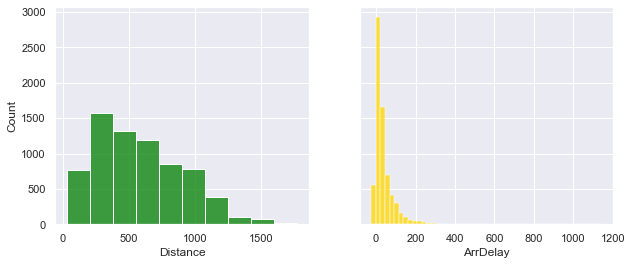

In [22]:
sns.set(style="darkgrid")


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_1, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_1, x="ArrDelay",color="gold", ax=ax2, bins=50);


#### Cluster 2

In [23]:
df_cluster_2 = df_pca_kmeans.loc[df_pca_kmeans['Kmeans PCA'] == 2]
df_cluster_2.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
1,572804,4,4,5,1653.0,1834.0,17,101.0,60.0,52.0,124.0,83.0,76,130,239,0,-488.392287,-349.184151,2
5,1907542,12,2,2,1924.0,2158.0,4,154.0,176.0,131.0,7.0,29.0,104,150,1069,0,-443.117238,589.357501,2
6,191927,2,8,5,1933.0,2030.0,17,57.0,55.0,46.0,20.0,18.0,285,104,197,0,-787.329900,-237.618065,2
8,32943,1,8,2,1631.0,1838.0,18,127.0,88.0,87.0,120.0,81.0,157,258,337,0,-427.450390,-258.499046,2
9,1184087,7,1,2,1507.0,1846.0,9,219.0,157.0,105.0,76.0,14.0,18,162,761,0,-161.945924,93.191960,2


In [24]:
df_cluster_2.describe()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA
count,9.359000e+03,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.000000,9359.0
mean,9.574344e+05,6.085800,15.711294,4.050005,1801.461054,1985.921573,11.487659,111.721979,112.247783,86.563522,44.855113,45.380917,143.383161,147.159846,577.432845,0.267443,-502.253129,51.351655,2.0
std,5.513333e+05,3.443466,8.822112,1.998359,224.238170,220.058774,5.873773,44.159185,41.516321,39.304949,54.921870,50.165860,81.277445,81.500264,311.738895,0.442649,296.696975,322.701831,0.0
min,2.760000e+02,1.000000,1.000000,1.000000,1241.000000,1525.000000,0.000000,22.000000,27.000000,11.000000,-43.000000,6.000000,0.000000,0.000000,31.000000,0.000000,-1256.145906,-659.684000,2.0
25%,4.744105e+05,3.000000,8.000000,2.000000,1622.000000,1814.000000,6.000000,76.000000,79.000000,55.000000,10.000000,14.000000,79.000000,80.000000,321.000000,0.000000,-723.073688,-190.117671,2.0
50%,9.605240e+05,6.000000,16.000000,4.000000,1811.000000,2006.000000,13.000000,106.000000,106.000000,80.000000,27.000000,27.000000,150.000000,155.000000,533.000000,0.000000,-499.585900,18.422635,2.0
75%,1.440386e+06,9.000000,23.000000,6.000000,1959.000000,2156.500000,17.000000,143.000000,145.000000,115.000000,61.000000,59.000000,210.000000,210.000000,810.000000,1.000000,-282.354340,268.108666,2.0
max,1.927971e+06,12.000000,31.000000,7.000000,2335.000000,2400.000000,19.000000,386.000000,256.000000,240.000000,620.000000,631.000000,302.000000,301.000000,1515.000000,1.000000,210.523379,1144.249249,2.0


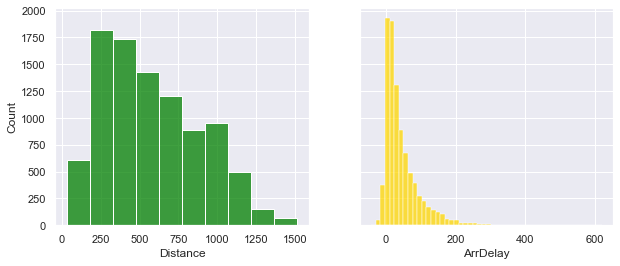

In [25]:
sns.set(style="darkgrid")

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(10, 4))
sns.histplot(data=df_cluster_2, x="Distance",color="green", ax=ax1 , bins=10)
sns.histplot(data=df_cluster_2, x="ArrDelay",color="gold", ax=ax2, bins=50);


Hicimos la analisis de los tres cluters ( 0, 1 y 2).

Segun las estatisticas (**.describe()**) de cada cluster , verificamos que el atributo que tuve la mayor diferencia entre los promedios fue la **Distancia**.

En el **cluster 0**, el promedio de la **distancia** fue de **1886 millas** y el promedio del **retraso en la llegada** de los vuelos fue de **37 minutos**.

En el **cluster 1**, el promedio de la **distancia** fue de **581 millas** y el promedio del **retraso en la llegada** de los vuelos fue de **39 minutos**.

En el **cluster 2**, el promedio de la **distancia** fue de **577 millas** y el promedio del **retraso en la llegada** de los vuelos fue de **44 minutos**.


Podemos verificar que cuanto mayor la distancia de viaje de los vuelos, menor es  su retraso en la llegada. 

### Ejercicio 2

**Clasifica los diferentes vuelos usando el algoritmo de clustering jerárquico.**

In [26]:
# importar la libreria 
import scipy.cluster.hierarchy as sch


En el Kmeans Clustering, el **codo** es el método para encontrar el número óptimo de grupos.

En el clustering jerárquico, el **dendrograma** es el método para encontrar el número óptimo de conglomerados .

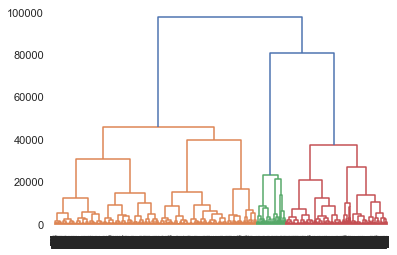

In [27]:
dendrogram = sch.dendrogram(sch.linkage(PCA_components, method='ward'))

El eje x contiene las muestras y el eje y representa la distancia entre estas muestras. La línea vertical con distancia máxima es la línea azul y por lo tanto podemos decidir un umbral de 60000 y cortar el dendrograma:

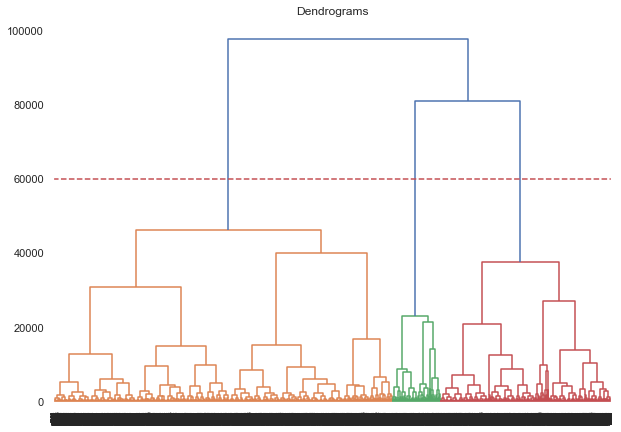

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(PCA_components, method='ward'))
plt.axhline(y=60000, color='r', linestyle='--')

Tenemos tres grupos, ya que esta línea corta el dendrograma en tres puntos. Apliquemos ahora la agrupación en clústeres jerárquica para 3 clústeres:

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit(PCA_components)

AgglomerativeClustering(n_clusters=3)

In [49]:
labels_hier = cluster.labels_
labels_hier[:20]

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0])

Podemos ver los valores de 0, 1 y 2 en la salida ya que definimos 3 grupos. 0 representa los puntos que pertenecen al primer grupo , 1 representa puntos en el segundo grupo y 2 al tercero grupo. Ahora visualicemos los 3 grupos

In [50]:
df_hier_pca = cluster.fit(PCA_components)

In [51]:
clusters_all_pca = pd.concat([df_pca_kmeans, pd.DataFrame({'pca_clusters_hier':labels_hier})], axis=1)

In [52]:
clusters_all_pca.head()

,id_flights,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,weekend,principal component 1,principal component 2,Kmeans PCA,pca_clusters_hier
0,965981,6,8,7,1920.0,102.0,15,222.0,230.0,202.0,3.0,11.0,80,37,1754,1,1391.416782,325.634187,0,1
1,572804,4,4,5,1653.0,1834.0,17,101.0,60.0,52.0,124.0,83.0,76,130,239,0,-488.392287,-349.184151,2,0
2,575159,4,6,7,2111.0,2344.0,17,273.0,275.0,260.0,149.0,151.0,35,157,1797,1,-302.103792,1370.772127,0,0
3,12129,1,13,7,1118.0,1216.0,17,58.0,60.0,45.0,11.0,13.0,264,47,296,1,245.120891,-697.893845,1,1
4,477533,3,1,6,625.0,930.0,7,125.0,127.0,111.0,23.0,25.0,137,18,781,1,933.015436,-506.704953,1,1


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


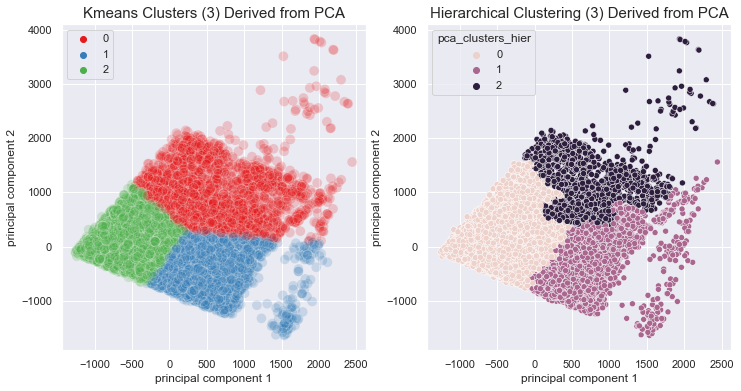

In [53]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.scatterplot(clusters_pca.iloc[:,0], clusters_pca.iloc[:,1],
               hue = labels_pca, palette='Set1', s=100,
               alpha=0.2).set_title('Kmeans Clusters (3) Derived from PCA',
                                   fontsize=15)



plt.subplot(1,2,2)
sns.scatterplot(x='principal component 1',y='principal component 2',
                data=clusters_all_pca,hue='pca_clusters_hier').set_title('Hierarchical Clustering (3) Derived from PCA',
                                   fontsize=15);

Podemos observar que la agrupación jerarquica es casi similar a lo que se hizo con la agrupación de K-Means


### Ejercicio 3

**Calcula el rendimiento del clustering mediante un parámetro Silhouette Coefficient**

Aunque e usó k = 3, compararé el coeficiente con el de k = 4, ya que era un valor que parecía razonable en el gráfico del codo.

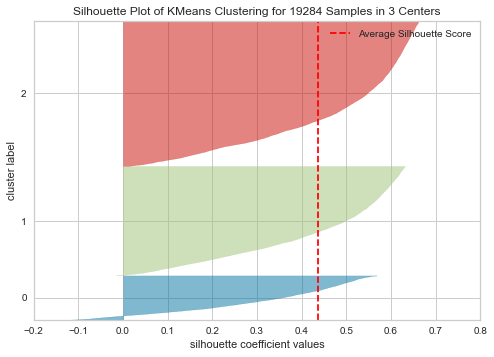

In [64]:
from yellowbrick.cluster import SilhouetteVisualizer

#k= 3
visualizer = SilhouetteVisualizer(k_means_pca, colors='yellowbrick')

visualizer.fit(PCA_components)        # Fit the data to the visualizer
visualizer.show();      # Finalize and render the figure

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(PCA_components, k_means_pca.labels_)

0.4366087449843219

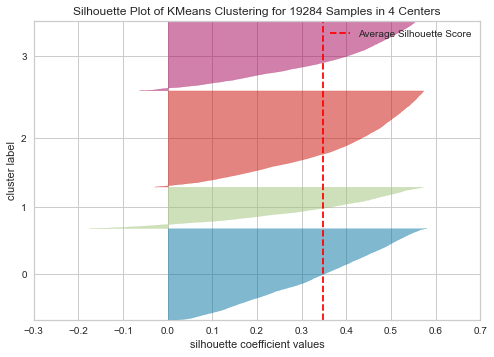

In [68]:
#k=4

visualizer = SilhouetteVisualizer(KMeans(init = "k-means++", 
                                         n_clusters = 4, n_init = 12, 
                                         random_state=42).fit(PCA_components), colors='yellowbrick')

visualizer.fit(PCA_components)        # Fit the data to the visualizer
visualizer.show();      # Finalize and render the figure

In [69]:
silhouette_score(PCA_components, (KMeans(init = "k-means++", n_clusters = 4, n_init = 12, random_state=42).fit(PCA_components)).labels_)

0.34851613208565646

La línea punteada vertical representa la puntuación de silueta para cada número de conglomerados. Cuando k = 3 o k = 4, los grupos se ven bastante bien. Todos los casos se extienden más allá de la línea discontinua, hacia la derecha. Pero k= 3 tiene el coeficiente de 0.43  y k=4 tiene el coeficiente menor, de 0.34. 

Cuando k = 3, el primero conglomerado (desde arriba) es bastante grande, mientras que cuando k = 4, los dos primeros y el ultimo  conglomerados tienen tamaños similares, pero el tercero desde arriba es pequeño.

**Parece una buena idea usar k = 3**, aunque los grupos no sean de tamaños similares pero la puntage de silieta es mejor.
